# Integration of 2D functions using the Legendre-Gauss/Lobatto-Gauss quadrature

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

from matplotlib import pyplot as plt
import numpy as np
import arrayfire as af

from dg_maxwell import params
from dg_maxwell import utils
from dg_maxwell import lagrange
from dg_maxwell import wave_equation_2d as w2d

af.set_backend(params.backend)

plt.rcParams['figure.figsize']     = 12, 7.5
plt.rcParams['lines.linewidth']    = 1.5
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.weight']        = 'bold'
plt.rcParams['font.size']          = 20  
plt.rcParams['font.sans-serif']    = 'serif'
plt.rcParams['text.usetex']        = True
plt.rcParams['axes.linewidth']     = 1.5
plt.rcParams['axes.titlesize']     = 'medium'
plt.rcParams['axes.labelsize']     = 'medium'

plt.rcParams['xtick.major.size']   = 8
plt.rcParams['xtick.minor.size']   = 4
plt.rcParams['xtick.major.pad']    = 8
plt.rcParams['xtick.minor.pad']    = 8
plt.rcParams['xtick.color']        = 'k'
plt.rcParams['xtick.labelsize']    = 'medium'
plt.rcParams['xtick.direction']    = 'in'    

plt.rcParams['ytick.major.size']   = 8
plt.rcParams['ytick.minor.size']   = 4
plt.rcParams['ytick.major.pad']    = 8
plt.rcParams['ytick.minor.pad']    = 8
plt.rcParams['ytick.color']        = 'k'
plt.rcParams['ytick.labelsize']    = 'medium'
plt.rcParams['ytick.direction']    = 'in'
plt.rcParams['text.usetex']        = True
plt.rcParams['text.latex.unicode'] = True

/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)
/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1220: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


In [2]:
N_LGL = 8
xi_LGL  = lagrange.LGL_points(N_LGL)
eta_LGL = lagrange.LGL_points(N_LGL)
Xi, Eta = utils.af_meshgrid(xi_LGL, eta_LGL)

_, Li_xi  = lagrange.lagrange_polynomials(xi_LGL)
_, Lj_eta = lagrange.lagrange_polynomials(eta_LGL)

Li_xi  = af.np_to_af_array(Li_xi)
Lj_eta = af.np_to_af_array(Lj_eta)
Lp_xi  = Li_xi.copy()
Lq_eta = Lj_eta.copy()

/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)
/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1220: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


In [3]:
Li_Lp = utils.poly1d_product(Li_xi, Lp_xi)
Lj_Lq = utils.poly1d_product(Lj_eta, Lq_eta)

In [4]:
def function(x, y):
#     return af.sin(4 * ((x - 0.3)**2 + (y + 0.3)**2)) \
#          + af.cos(4 * ((x - 0.3)**2 + (y + 0.3)**2))
#     return af.sin(4 * ((x - 0.3)**2 + (y + 0.3)**2))
    return np.e**(-(x**2 + y**2) / 0.6**2)
#     return np.e**(-(0.5 * x**2 + 2. * y**2) / 0.6**2)
#     return af.sin(((x - 0.3)**2 + (y + 0.3)**2)) ** 4
#     return (af.sin((x**2 + y**2)) * af.cos((x**2 + y**2)))**4
#     return np.e**(-(x + y) / 0.6**2)

In [10]:
print(Eta)

arrayfire.Array()
Type: double

[8 8 1 1]
   -1.0000    -1.0000    -1.0000    -1.0000    -1.0000    -1.0000    -1.0000    -1.0000 
   -0.8717    -0.8717    -0.8717    -0.8717    -0.8717    -0.8717    -0.8717    -0.8717 
   -0.5917    -0.5917    -0.5917    -0.5917    -0.5917    -0.5917    -0.5917    -0.5917 
   -0.2093    -0.2093    -0.2093    -0.2093    -0.2093    -0.2093    -0.2093    -0.2093 
    0.2093     0.2093     0.2093     0.2093     0.2093     0.2093     0.2093     0.2093 
    0.5917     0.5917     0.5917     0.5917     0.5917     0.5917     0.5917     0.5917 
    0.8717     0.8717     0.8717     0.8717     0.8717     0.8717     0.8717     0.8717 
    1.0000     1.0000     1.0000     1.0000     1.0000     1.0000     1.0000     1.0000 




/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


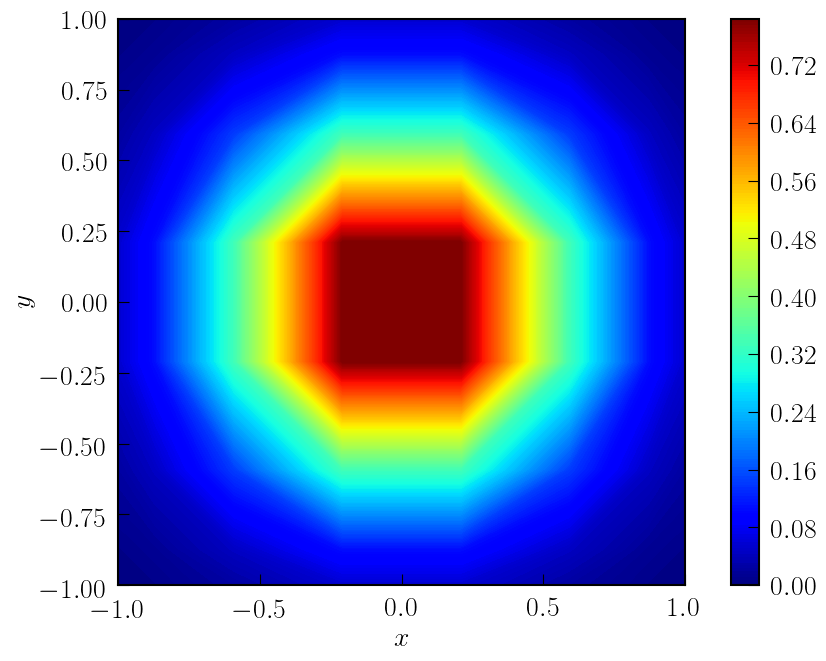

In [17]:
function_ij = function(Xi, Eta)
function_ij_tile = af.flat(function_ij)

# print(gaussian_xy_ij)
plt.contourf(np.array(Xi), np.array(Eta), np.array(function_ij),
             200, cmap = 'jet')

plt.axes().set_aspect('equal')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.colorbar()

# plt.savefig('u_init.png')
plt.show()

In [ ]:
def integrate_2d_general(u_ij)

In [18]:
# print(Lq_eta)
Lp_xi_tile = af.reorder(Lq_eta, d0 = 2, d1 = 0, d2 = 1)
Lp_xi_tile = af.tile(Lp_xi_tile, d0 = N_LGL)
Lp_xi_tile = af.moddims(Lp_xi_tile, d0 = N_LGL * N_LGL, d1 = 1, d2 = N_LGL)
Lp_xi_tile = af.reorder(Lp_xi_tile, d0 = 0, d1 = 2, d2 = 1)

Lq_eta_tile = af.reorder(Lq_eta, d0 = 0, d1 = 2, d2 = 1)
Lq_eta_tile = af.tile(Lq_eta_tile, d0 = N_LGL)
Lq_eta_tile = af.reorder(Lq_eta_tile, d0 = 0, d1 = 2, d2 = 1)

In [19]:
integral = function_ij_tile * utils.integrate_2d(Lp_xi_tile, Lq_eta_tile, order = 9, scheme = 'gauss')
# \int \Sum Lp*Lq*function(xi_LGL_p, eta_LGL_q)
# \Sum \int Lp*Lq*function(xi_LGL_p, eta_LGL_q)
# \Sum function(xi_LGL_p, eta_LGL_q) * \int Lp*Lq
#
integral = af.sum(integral, dim = 0)
af.display(integral, 14)

In [21]:
print(Eta)

arrayfire.Array()
Type: double

[8 8 1 1]
   -1.0000    -1.0000    -1.0000    -1.0000    -1.0000    -1.0000    -1.0000    -1.0000 
   -0.8717    -0.8717    -0.8717    -0.8717    -0.8717    -0.8717    -0.8717    -0.8717 
   -0.5917    -0.5917    -0.5917    -0.5917    -0.5917    -0.5917    -0.5917    -0.5917 
   -0.2093    -0.2093    -0.2093    -0.2093    -0.2093    -0.2093    -0.2093    -0.2093 
    0.2093     0.2093     0.2093     0.2093     0.2093     0.2093     0.2093     0.2093 
    0.5917     0.5917     0.5917     0.5917     0.5917     0.5917     0.5917     0.5917 
    0.8717     0.8717     0.8717     0.8717     0.8717     0.8717     0.8717     0.8717 
    1.0000     1.0000     1.0000     1.0000     1.0000     1.0000     1.0000     1.0000 




In [70]:
# Convergence test for integrate function

error = []
# ref_integral = 1.29963209362073 # function 0
# ref_integral = 0.945143816408656 # function 1
# ref_integral = 1.08968731296967 # function 2
# ref_integral = 1.02199637574522
# ref_integral = 1.33783253647835
# ref_integral = 0.108234186899320
ref_integral = 33.2650147380588
for n_LGL in np.arange(5, 24):
    n_LGL = int(n_LGL)
    print(n_LGL)
    xi_LGL  = lagrange.LGL_points(n_LGL)
    eta_LGL = lagrange.LGL_points(n_LGL)
    Xi, Eta = utils.af_meshgrid(xi_LGL, eta_LGL)

    _, Li_xi  = lagrange.lagrange_polynomials(xi_LGL)
    _, Lj_eta = lagrange.lagrange_polynomials(eta_LGL)

    Li_xi  = af.np_to_af_array(Li_xi)
    Lj_eta = af.np_to_af_array(Lj_eta)
    Lp_xi  = Li_xi.copy()
    Lq_eta = Lj_eta.copy()

    Li_Lp = utils.poly1d_product(Li_xi, Lp_xi)
    Lj_Lq = utils.poly1d_product(Lj_eta, Lq_eta)

    function_ij = function(Xi, Eta)
    function_ij_tile = af.flat(function_ij)


    # print(Lq_eta)
    Lp_xi_tile = af.reorder(Lq_eta, d0 = 2, d1 = 0, d2 = 1)
    Lp_xi_tile = af.tile(Lp_xi_tile, d0 = n_LGL)
    Lp_xi_tile = af.moddims(Lp_xi_tile, d0 = n_LGL * n_LGL, d1 = 1, d2 = n_LGL)
    Lp_xi_tile = af.reorder(Lp_xi_tile, d0 = 0, d1 = 2, d2 = 1)

    Lq_eta_tile = af.reorder(Lq_eta, d0 = 0, d1 = 2, d2 = 1)
    Lq_eta_tile = af.tile(Lq_eta_tile, d0 = n_LGL)
    Lq_eta_tile = af.reorder(Lq_eta_tile, d0 = 0, d1 = 2, d2 = 1)


    integral = function_ij_tile * utils.integrate_2d(Lp_xi_tile, Lq_eta_tile, order = 9, scheme = 'gauss')
    integral = af.sum(integral, dim = 0)
    error.append(np.array(af.abs(integral - ref_integral))[0])
    
error = np.array(error)

5
6
7
8
9
10
11
12
13
14


/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)
/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1220: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


15
16
17
18
19
20
21
22
23


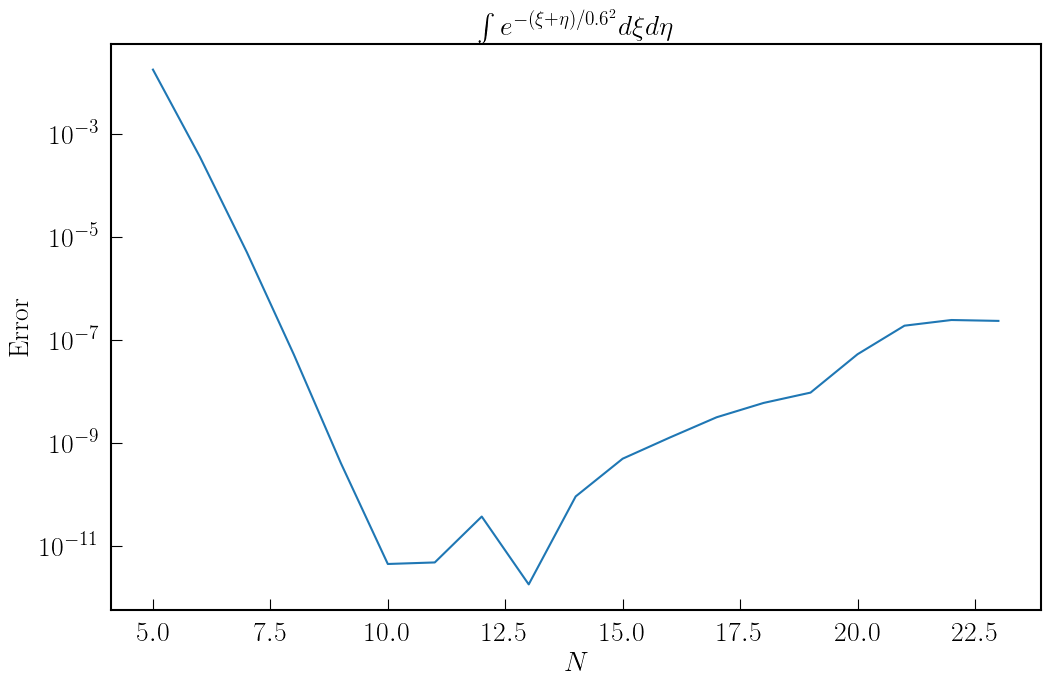

In [75]:
plt.title(r'$\int e^{-(\xi + \eta) / 0.6^2} d\xi d\eta$')
plt.xlabel(r'$N$')
plt.ylabel(r'Error')
plt.semilogy(np.arange(5, 24, dtype = np.int), error, )

plt.savefig('integrate_2d.png')
plt.show()